# Machine learing

## Further preprocessing

### Reading the necessary libraries and import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings;
warnings.filterwarnings('ignore');

Reading the preprocessed machine learning data formed in R
And removing the unnamed:0 kolom that will be inserted.

In [2]:
Influ_data_P = pd.read_csv("/kaggle/input/combined-data-p/combined_data_P.csv", index_col=0)
#Drop the donor IDs. These can't be used to make the machine learning model.
Influ_data_P = Influ_data_P.drop("donor_id", axis = 1)
print(Influ_data_P)

     B_cells  basophils  CD16_pos_monocytes  CD16_pos_CD14_pos_monocytes  \
1       34.4       1.45                5.85                         1.55   
2       41.0       0.19                7.78                         1.33   
3       34.6       0.21                4.10                         0.58   
4       34.8       0.29                1.64                         1.29   
5       40.8       0.64                3.45                         0.55   
..       ...        ...                 ...                          ...   
300     84.5       0.61               12.90                         4.48   
301     71.2       0.56               20.00                         8.72   
302     74.2       0.30               11.30                         3.41   
303     57.7       0.44                3.10                         1.14   
304     73.2       0.67                3.89                         3.05   

     CD16_pos_CD14_neg_monocytes  CD16_neg_CD56bright_NK_cells  \
1                    

### Dividing the data in a trainset and testset

In [3]:
from sklearn.model_selection import train_test_split

# Difining the features (X) and target (y)
X = Influ_data_P.drop('vaccine_response', axis=1)
y = Influ_data_P['vaccine_response']

# Dividing the data in train- en testdatasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#test_size=0,20 means that we use 30% as test data and 70% as traindata.
#Random_state=42 ensures that the distribution, between the train and testdata,is reproducible. By using a fixed number, we get always the same distribution if we run our code again from the beginning.
#Stratify=y is ensuring that both the training and test sets have a similar proportion of each class by stratified splitting. This helps maintain the class distribution in both sets.

# Control the split up of both datasets
print(f'Train set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Train set: (212, 411), (212,)
Test set: (92, 411), (92,)


Control if vaccine_response is out the X dataframe.

In [4]:
print(X)

     B_cells  basophils  CD16_pos_monocytes  CD16_pos_CD14_pos_monocytes  \
1       34.4       1.45                5.85                         1.55   
2       41.0       0.19                7.78                         1.33   
3       34.6       0.21                4.10                         0.58   
4       34.8       0.29                1.64                         1.29   
5       40.8       0.64                3.45                         0.55   
..       ...        ...                 ...                          ...   
300     84.5       0.61               12.90                         4.48   
301     71.2       0.56               20.00                         8.72   
302     74.2       0.30               11.30                         3.41   
303     57.7       0.44                3.10                         1.14   
304     73.2       0.67                3.89                         3.05   

     CD16_pos_CD14_neg_monocytes  CD16_neg_CD56bright_NK_cells  \
1                    

In [5]:
y_train.value_counts()

vaccine_response
0    150
1     62
Name: count, dtype: int64

In [6]:
y_test.value_counts()

vaccine_response
0    65
1    27
Name: count, dtype: int64

We can see that the amount of non-vaccine responders is double the  amount of vaccine responders. Thus we have a class imbalance.

### Standardization of the data

**Using StandardScaler()**

*A) The train set (X_train)*

First looking at the summary of alle the features. They are all expressed in the same units,% of Parent, see preprocessing in R. But the numbers are not on the same scale. Some are 0.-numbers and others are 80+-numbers.

In [7]:
print(X.describe())

          B_cells   basophils  CD16_pos_monocytes  \
count  304.000000  304.000000          304.000000   
mean    47.801902    0.460686            4.979733   
std     13.592041    0.265305            3.891695   
min      8.586667    0.020000            0.000000   
25%     38.683333    0.327500            2.377500   
50%     47.500000    0.453684            4.430000   
75%     56.425000    0.477600            6.042500   
max     86.600000    1.800000           25.700000   

       CD16_pos_CD14_pos_monocytes  CD16_pos_CD14_neg_monocytes  \
count                   304.000000                   304.000000   
mean                      2.419688                     2.760503   
std                       1.740978                     2.962802   
min                       0.000000                     0.000000   
25%                       1.782500                     0.807500   
50%                       2.035575                     2.275000   
75%                       3.347600                   

> Visualize the data in boxplots.

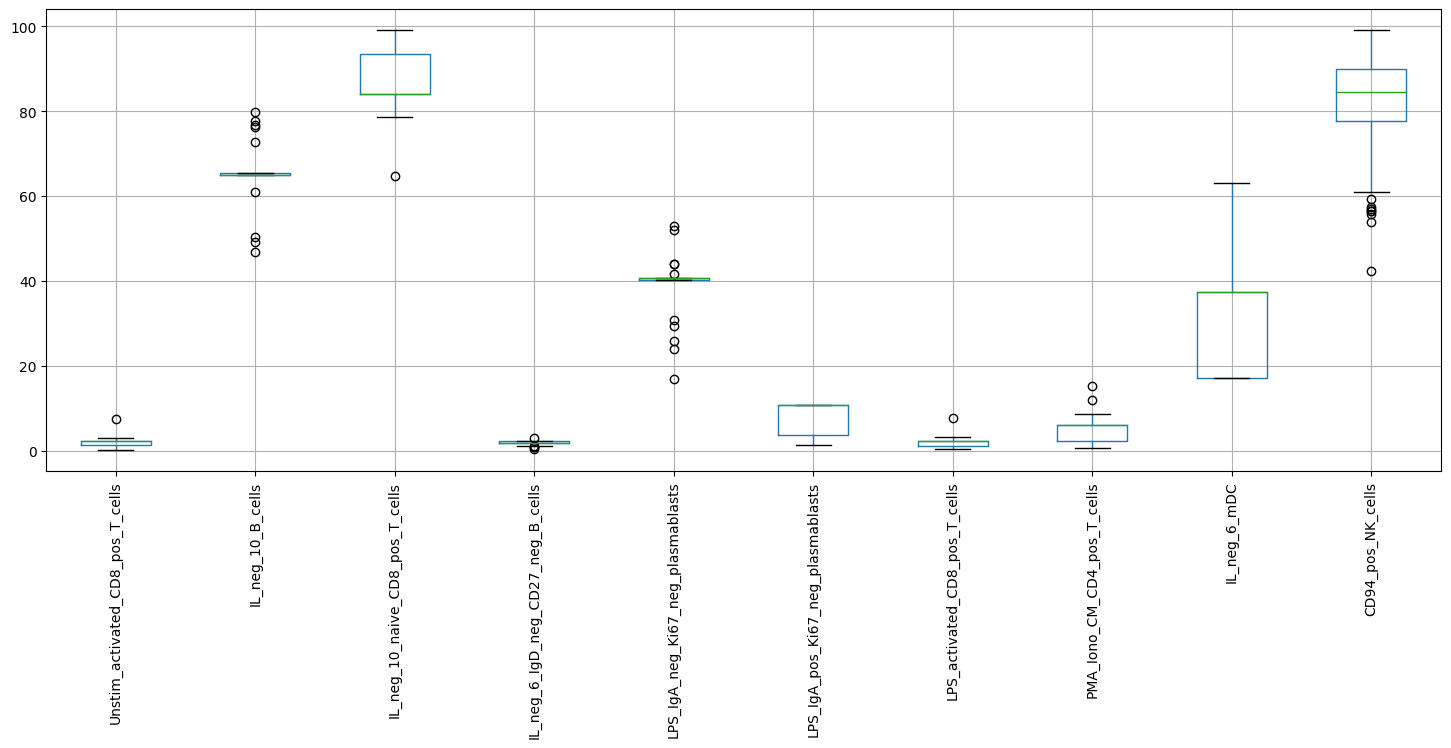

In [8]:
plt.figure(figsize=(18,6)) #set the size of the plot
X_train.sample(10, axis="columns").boxplot()
plt.xticks(rotation=90) #rotate the gene names on the x-axis
plt.show() #show the plot

We can see that the features have clearly different scales and there are some outliers. We will normalize the features using StandardScaler.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()

In [10]:
scaler_std.fit(X_train)
#fit computes the mean and the standard deviation for each attribute.

print("Means:")
print(scaler_std.mean_)
print("Variances:")
print(scaler_std.var_)

Means:
[4.66561407e+01 4.73234260e-01 4.96995085e+00 2.47604630e+00
 2.71825119e+00 1.82005546e+00 6.36977289e+01 4.66239087e+01
 9.37417243e+00 4.18897036e-01 3.25989545e+00 1.00815123e+01
 2.94754417e+01 8.33347760e+01 7.43649623e+01 5.59100255e+01
 9.04196515e+01 9.55987388e+01 4.74745288e+01 2.72156912e+00
 1.65602542e+01 3.10378762e+01 3.52487606e+00 1.54872827e+01
 8.27846185e+01 1.17618357e+00 6.47701910e+00 3.24423008e+01
 6.13594517e+00 2.90585157e+00 1.84209367e+01 1.28729348e+01
 2.12840628e+01 3.13327628e+00 2.25978860e+00 4.35041685e-01
 1.42372952e+00 2.28270463e+00 2.30562331e+00 9.88676883e+00
 8.38652845e+00 2.59640700e+01 1.40086558e+01 9.81710857e+00
 6.86960129e+01 1.19142719e+01 9.57175992e+00 2.31815736e+01
 1.63885051e+01 1.69716588e+01 8.00194500e+01 5.17811190e+01
 5.41719441e+01 1.82663552e+01 3.97613695e+00 1.14484312e+01
 1.36197266e+01 1.05779278e+01 1.39312025e+00 6.78783688e+01
 1.59365560e+01 3.29712790e+00 3.86791539e+01 5.06715531e+01
 3.67109007e+01 5

Now, Normalize the features in the train set
The scaler object has a function transform() that uses the means and variances computed by the fit() function to normalize the feature

In [11]:
X_train_std = scaler_std.transform(X_train)

X_train_std

array([[-1.17974003,  0.70761303, -0.56474581, ..., -1.14451191,
         1.15923936, -1.28721503],
       [-0.82402726, -0.08355553,  0.05758602, ...,  0.46633113,
        -0.54429475,  0.58922467],
       [-0.94002055, -0.07030629, -0.71004796, ...,  0.46633113,
        -0.54429475,  0.58922467],
       ...,
       [-0.27499232, -1.62993044, -1.35979529, ...,  0.46633113,
        -0.54429475,  0.58922467],
       [-1.43492528,  0.01570016, -0.78681136, ..., -1.14451191,
         1.15923936, -1.28721503],
       [ 0.54469364, -1.01857291, -0.41670212, ...,  0.46633113,
        -0.54429475,  0.58922467]])

The column names are missing after the transform() function. So we add them back by making a new panda dataframe.

In [12]:
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)

X_train_std

,B_cells,basophils,CD16_pos_monocytes,CD16_pos_CD14_pos_monocytes,CD16_pos_CD14_neg_monocytes,CD16_neg_CD56bright_NK_cells,CD161_pos_NK_cells,CD161_pos_NKT_cells,CD161_pos_CD4_pos_T_cells,CD161_pos_CD45RA_pos_Tregs,...,CD314_neg_CD94_neg_CD8_neg_T_cells,CD33_pos_monocytes,CD8_neg_T_cells,CXCR3_pos_B_cells,CXCR3_pos_CD33_pos_monocytes,CXCR3_pos_NK_cells,CXCR3_pos_CD4_pos_T_cells,CXCR3_pos_CD8_pos_T_cells,CD28_pos_CD4_pos_T_cells,CD314_pos_CD94_pos_CD8_pos_T_cells
0,-1.179740,0.707613,-0.564746,0.124537,-0.901679,0.138260,-0.667984,-1.121736,0.103118,0.826278,...,0.702277,0.923533,0.765223,-1.302380,-1.290250,-1.186171,-1.285604,-1.144512,1.159239,-1.287215
1,-0.824027,-0.083556,0.057586,1.661220,-0.710604,-1.826122,0.878601,0.427020,0.607344,2.721491,...,-0.307452,-0.455160,-0.377521,0.588107,0.534968,0.537493,0.574033,0.466331,-0.544295,0.589225
2,-0.940021,-0.070306,-0.710048,-0.256388,0.162114,-0.091088,0.606402,0.158117,0.630474,-0.739333,...,-0.307452,-0.455160,-0.377521,0.588107,0.534968,0.537493,0.574033,0.466331,-0.544295,0.589225
3,-0.932288,-0.946648,-0.238501,-1.103645,0.308462,0.608605,1.058005,1.028546,-0.246139,0.187673,...,-0.307452,-0.455160,-0.377521,0.588107,0.534968,0.537493,0.574033,0.466331,-0.544295,0.589225
4,-1.999426,-1.378195,-0.715531,0.473784,-0.901679,2.088809,-0.896879,0.019089,0.792382,0.620276,...,0.702277,0.923533,0.765223,-1.302380,-1.290250,-1.186171,-1.285604,-1.144512,1.159239,-1.287215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,-1.318932,-0.070306,-0.397511,-0.256388,0.162114,-0.091088,0.074377,0.158117,0.445437,-0.739333,...,-0.307452,-0.455160,-0.377521,0.588107,0.534968,0.537493,0.574033,0.466331,-0.544295,0.589225
208,-1.272535,-0.982611,1.625753,4.082660,0.152771,-1.272775,-0.581375,-0.520210,-0.000965,2.309488,...,-0.307452,-0.455160,-0.377521,0.588107,0.534968,0.537493,0.574033,0.466331,-0.544295,0.589225
209,-0.274992,-1.629930,-1.359795,-1.435428,-0.961832,-1.839956,1.614775,2.114058,1.740697,1.382482,...,-0.307452,-0.455160,-0.377521,0.588107,0.534968,0.537493,0.574033,0.466331,-0.544295,0.589225
210,-1.434925,0.015700,-0.786811,0.507311,-0.340556,0.046128,-0.222568,-0.215699,-0.051850,-0.862934,...,0.702277,0.923533,0.765223,-1.302380,-1.290250,-1.186171,-1.285604,-1.144512,1.159239,-1.287215


> Visualization of the features after normalization

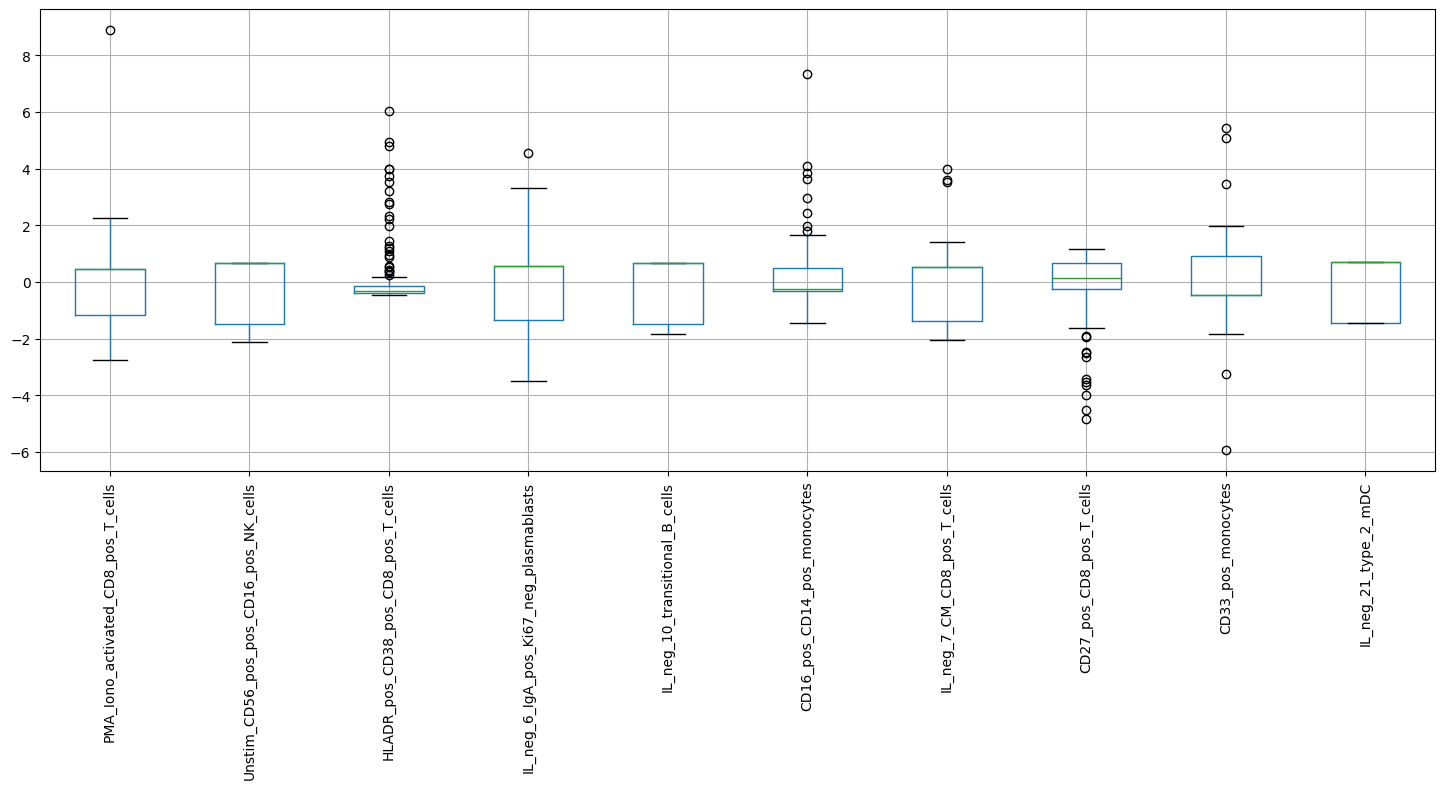

In [13]:
plt.figure(figsize=(18,6))
X_train_std.sample(10, axis="columns").boxplot()
plt.xticks(rotation=90)
plt.show()

We can see that the boxplots are now on the same scale. However there are still some outliers. We will keep them, because we can't know it these were measured wrong.

*B) The test set (X_test)*

Here we do exactly these, only we so everything in one line of code.

In [14]:
X_test_std = pd.DataFrame(scaler_std.transform(X_test),columns=X_test.columns)

> Visualization after normalization

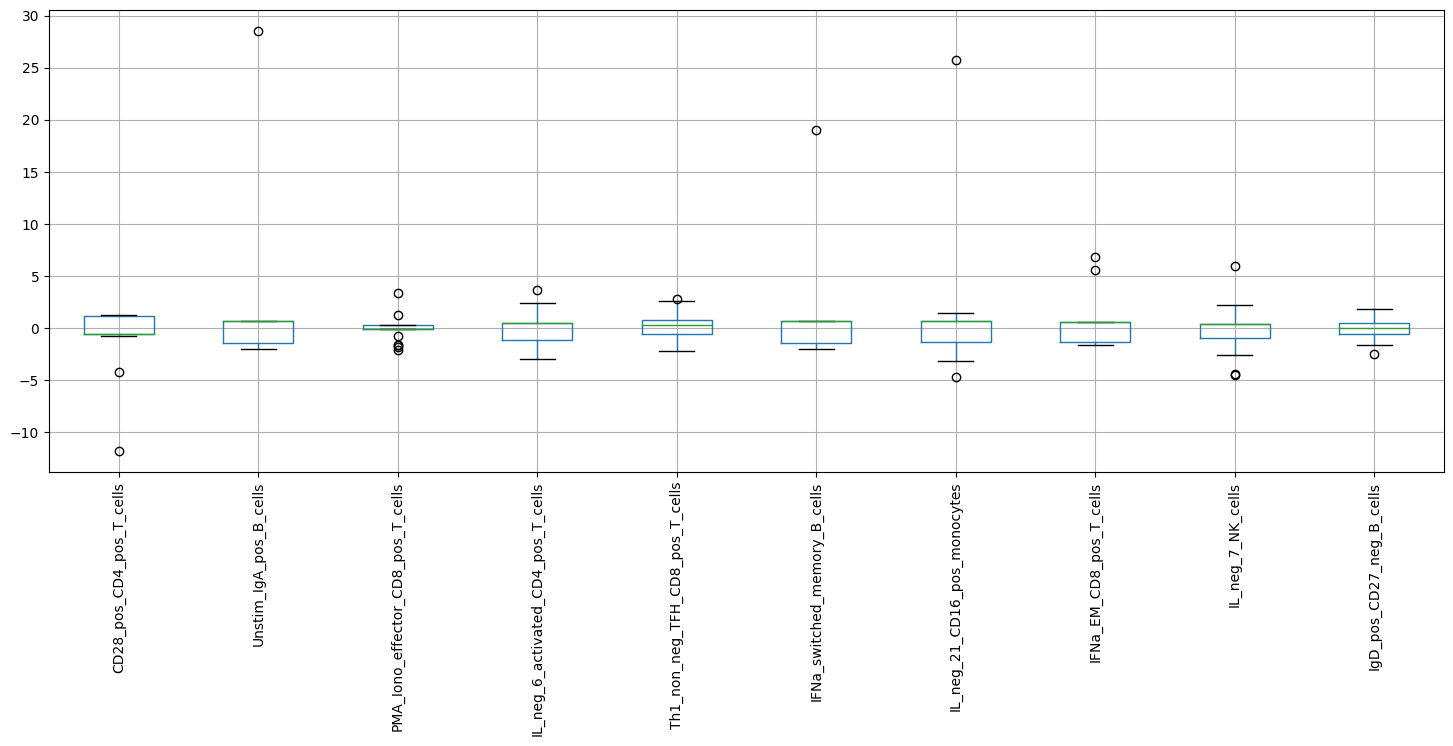

In [15]:
plt.figure(figsize=(18,6))
X_test_std.sample(10, axis="columns").boxplot()
plt.xticks(rotation=90)
plt.show()

**Standardization with MinMaxScaler()**

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()

In [17]:
scaler_minmax.fit(X_train)
X_train_minmax = pd.DataFrame(scaler_minmax.transform(X_train), columns = X_train.columns)
X_train_minmax

,B_cells,basophils,CD16_pos_monocytes,CD16_pos_CD14_pos_monocytes,CD16_pos_CD14_neg_monocytes,CD16_neg_CD56bright_NK_cells,CD161_pos_NK_cells,CD161_pos_NKT_cells,CD161_pos_CD4_pos_T_cells,CD161_pos_CD45RA_pos_Tregs,...,CD314_neg_CD94_neg_CD8_neg_T_cells,CD33_pos_monocytes,CD8_neg_T_cells,CXCR3_pos_B_cells,CXCR3_pos_CD33_pos_monocytes,CXCR3_pos_NK_cells,CXCR3_pos_CD4_pos_T_cells,CXCR3_pos_CD8_pos_T_cells,CD28_pos_CD4_pos_T_cells,CD314_pos_CD94_pos_CD8_pos_T_cells
0,0.269902,0.365169,0.141951,0.178146,0.009290,0.272890,0.502957,0.283674,0.326539,0.377880,...,0.824627,0.603448,0.679487,0.05500,0.118256,0.169399,0.12945,0.376268,0.929487,0.088286
1,0.333150,0.241573,0.252683,0.352980,0.038798,0.017953,0.787307,0.550214,0.411995,0.801843,...,0.752488,0.482120,0.585871,0.31174,0.418006,0.358607,0.32794,0.546907,0.711004,0.404931
2,0.312526,0.243643,0.116098,0.134806,0.173574,0.243126,0.737261,0.503936,0.415915,0.027650,...,0.752488,0.482120,0.585871,0.31174,0.418006,0.358607,0.32794,0.546907,0.711004,0.404931
3,0.313901,0.106742,0.200000,0.038411,0.196175,0.333932,0.820291,0.653736,0.267346,0.235023,...,0.752488,0.482120,0.585871,0.31174,0.418006,0.358607,0.32794,0.546907,0.711004,0.404931
4,0.124158,0.039326,0.115122,0.217881,0.009290,0.526032,0.460874,0.480010,0.443356,0.331797,...,0.824627,0.603448,0.679487,0.05500,0.118256,0.169399,0.12945,0.376268,0.929487,0.088286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.245153,0.243643,0.171707,0.134806,0.173574,0.243126,0.639445,0.503936,0.384555,0.027650,...,0.752488,0.482120,0.585871,0.31174,0.418006,0.358607,0.32794,0.546907,0.711004,0.404931
208,0.253403,0.101124,0.531707,0.628477,0.172131,0.089767,0.518881,0.387197,0.308898,0.709677,...,0.752488,0.482120,0.585871,0.31174,0.418006,0.358607,0.32794,0.546907,0.711004,0.404931
209,0.430771,0.000000,0.000488,0.000662,0.000000,0.016158,0.922657,0.840552,0.604077,0.502304,...,0.752488,0.482120,0.585871,0.31174,0.418006,0.358607,0.32794,0.546907,0.711004,0.404931
210,0.224529,0.257079,0.102439,0.221695,0.095945,0.260934,0.584850,0.439603,0.300274,0.000000,...,0.824627,0.603448,0.679487,0.05500,0.118256,0.169399,0.12945,0.376268,0.929487,0.088286


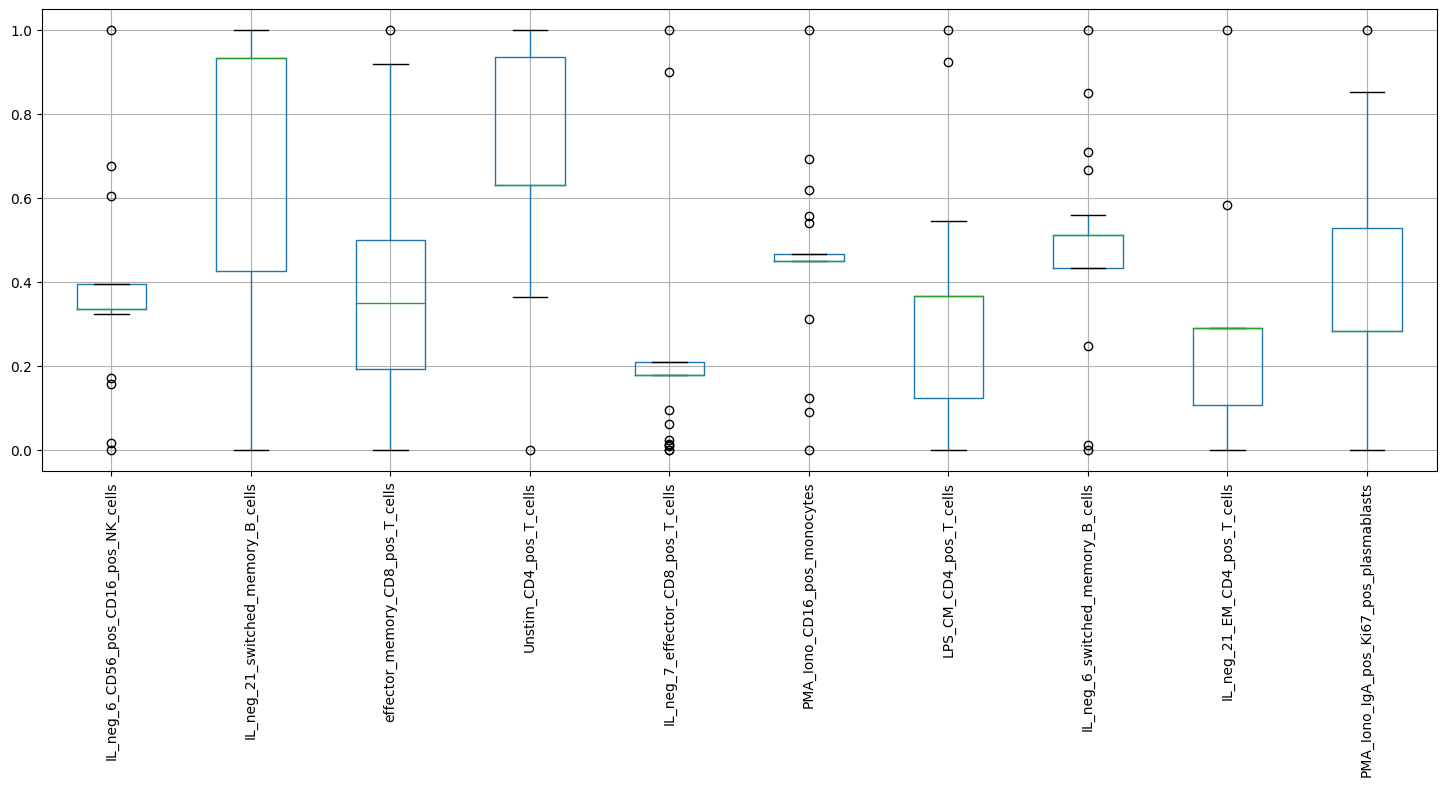

In [18]:
plt.figure(figsize=(18,6))
X_train_minmax.sample(10, axis="columns").boxplot()
plt.xticks(rotation=90)
plt.show()

After this we see that the minmax scaling is less good for our dataset. Hereby we use the data with the Standardscaler()

## Model Training 1: logistic regression

### Fit a logistic regression model

In [19]:
from sklearn.linear_model import LogisticRegression
cls_std = LogisticRegression()

Train the model on the normalized train data

In [20]:
cls_std.fit(X_train_std, y_train)

LogisticRegression()

The fitted modelparameters

In [21]:
cls_std.coef_[0]

array([-4.78525088e-03,  1.25201911e-03,  1.32317728e-02,  2.80340577e-02,
        3.54104463e-04,  5.75562185e-03,  4.16669402e-03, -2.17752543e-02,
        5.18447621e-03,  1.47303250e-02,  1.26484744e-02,  6.05261490e-03,
       -3.41514313e-03, -1.04952359e-02,  4.72903749e-03, -1.62636090e-03,
       -7.78666286e-03, -6.52875360e-03,  6.58211809e-03,  1.34437304e-03,
        5.20855135e-03,  4.39933701e-03,  1.62997997e-02,  9.56012647e-03,
       -1.09210815e-02,  6.50055057e-03,  9.18053210e-03,  6.10542982e-03,
        9.24477135e-03, -2.27866856e-04, -2.40453145e-03,  6.44688349e-03,
        1.04640579e-02, -4.27097090e-03,  7.78142853e-03, -4.91513830e-03,
       -2.29661894e-03,  1.28462695e-02,  1.29910421e-03, -9.55566622e-03,
       -6.95001749e-03,  4.40017027e-03,  9.91865813e-03, -2.59946864e-02,
        5.87279272e-03, -2.94097601e-04,  1.07970531e-02,  1.69364312e-02,
        5.12474749e-05,  7.57556772e-03, -8.30951889e-04, -7.53225979e-03,
       -6.43089742e-03,  

Predictions for the datapoints in the test set (X_test_std)

In [22]:
predictions_std = cls_std.predict(X_test_std)
predictions_std

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0])

0 represents no vaccine respons and 1 represents vaccine respons.
Here showing the predicted class label for each row in the X_test_std (normalized test set).

Now looking at the class probabilities in stead of classes. (Using the predict_proba() function.

In [23]:
predictions_std = cls_std.predict_proba(X_test_std)
predictions_std[:10]

array([[9.99867504e-01, 1.32495593e-04],
       [9.99965919e-01, 3.40809563e-05],
       [4.99303299e-04, 9.99500697e-01],
       [9.99947564e-01, 5.24355802e-05],
       [9.99927238e-01, 7.27620300e-05],
       [9.99916862e-01, 8.31378471e-05],
       [9.89603347e-01, 1.03966535e-02],
       [9.99924764e-01, 7.52356207e-05],
       [9.99931895e-01, 6.81054845e-05],
       [9.99918969e-01, 8.10306790e-05]])

These are the probability that the datapoint belongs to class 0 (first number) and class 1 (second number) respectively. 

What is the accuracy of the predictions?

In [24]:
print("Accuracy: {}".format(cls_std.score(X_test_std,y_test)))

Accuracy: 1.0


The accuracy of 1.0 can be due to that the dataset contains a class imbalance, becausethere are more non-responders then responders int the dataset. Eventhough we used a stratified splitting this cannot be rules out.

In [25]:
print("Accuracy: {}".format(cls_std.score(X_test,y_test)))

Accuracy: 0.717391304347826


We can see that the normalization of the data had a good effect, because the accurary improved quite a lot.

### Modelparameters and celtype importance

In [26]:
model_parameters = pd.DataFrame({"attribute": X_train.columns, 
                                 "parameter_value" : cls_std.coef_[0]})
model_parameters

,attribute,parameter_value
0,B_cells,-0.004785
1,basophils,0.001252
2,CD16_pos_monocytes,0.013232
3,CD16_pos_CD14_pos_monocytes,0.028034
4,CD16_pos_CD14_neg_monocytes,0.000354
...,...,...
406,CXCR3_pos_NK_cells,-0.069085
407,CXCR3_pos_CD4_pos_T_cells,-0.075959
408,CXCR3_pos_CD8_pos_T_cells,-0.066142
409,CD28_pos_CD4_pos_T_cells,0.068124


Sorting them from high to low (using sort_values())

In [27]:
model_parameters = model_parameters.sort_values(by="parameter_value")
model_parameters

,attribute,parameter_value
274,PMA_Iono_IgA_neg_Ki67_neg_plasmablasts,-0.083249
404,CXCR3_pos_B_cells,-0.077994
410,CD314_pos_CD94_pos_CD8_pos_T_cells,-0.076684
249,LPS_IgA_pos_Ki67_pos_plasmablasts,-0.076454
407,CXCR3_pos_CD4_pos_T_cells,-0.075959
...,...,...
409,CD28_pos_CD4_pos_T_cells,0.068124
137,LPS_CD25_pos_CD4_pos_T_cells,0.071712
122,PMA_Iono_CD16_pos_monocytes,0.078759
127,IL_neg_6_CD16_pos_CD56_neg_NK_cells,0.082250


We are here mainly interested in the absolute value of the modelparameter. This can be computed with the python abs() function

In [28]:
model_parameters["parameter_abs_value"] = model_parameters["parameter_value"].map(abs)
model_parameters

,attribute,parameter_value,parameter_abs_value
274,PMA_Iono_IgA_neg_Ki67_neg_plasmablasts,-0.083249,0.083249
404,CXCR3_pos_B_cells,-0.077994,0.077994
410,CD314_pos_CD94_pos_CD8_pos_T_cells,-0.076684,0.076684
249,LPS_IgA_pos_Ki67_pos_plasmablasts,-0.076454,0.076454
407,CXCR3_pos_CD4_pos_T_cells,-0.075959,0.075959
...,...,...,...
409,CD28_pos_CD4_pos_T_cells,0.068124,0.068124
137,LPS_CD25_pos_CD4_pos_T_cells,0.071712,0.071712
122,PMA_Iono_CD16_pos_monocytes,0.078759,0.078759
127,IL_neg_6_CD16_pos_CD56_neg_NK_cells,0.082250,0.082250


Sort by model_parameters by parameter_abs_value from high to low

In [29]:
model_parameters.sort_values(by = "parameter_abs_value")
model_parameters

,attribute,parameter_value,parameter_abs_value
274,PMA_Iono_IgA_neg_Ki67_neg_plasmablasts,-0.083249,0.083249
404,CXCR3_pos_B_cells,-0.077994,0.077994
410,CD314_pos_CD94_pos_CD8_pos_T_cells,-0.076684,0.076684
249,LPS_IgA_pos_Ki67_pos_plasmablasts,-0.076454,0.076454
407,CXCR3_pos_CD4_pos_T_cells,-0.075959,0.075959
...,...,...,...
409,CD28_pos_CD4_pos_T_cells,0.068124,0.068124
137,LPS_CD25_pos_CD4_pos_T_cells,0.071712,0.071712
122,PMA_Iono_CD16_pos_monocytes,0.078759,0.078759
127,IL_neg_6_CD16_pos_CD56_neg_NK_cells,0.082250,0.082250


We will select the top 20 most important cell types from model_parameters

In [30]:
selected_attributes = model_parameters.iloc[0:20, 0]
selected_attributes

274    PMA_Iono_IgA_neg_Ki67_neg_plasmablasts
404                         CXCR3_pos_B_cells
410        CD314_pos_CD94_pos_CD8_pos_T_cells
249         LPS_IgA_pos_Ki67_pos_plasmablasts
407                 CXCR3_pos_CD4_pos_T_cells
405              CXCR3_pos_CD33_pos_monocytes
113                    LPS_CD14_pos_monocytes
114               PMA_Iono_CD14_pos_monocytes
255    IL_neg_6_IgA_pos_Ki67_neg_plasmablasts
388                    CD20_neg_CD3_neg_cells
406                        CXCR3_pos_NK_cells
408                 CXCR3_pos_CD8_pos_T_cells
112               IL_neg_7_CD14_pos_monocytes
264    IL_neg_7_IgA_neg_Ki67_pos_plasmablasts
81              LPS_activated_CD4_pos_T_cells
397        CD314_neg_CD94_pos_CD8_pos_T_cells
92                               IFNa_B_cells
94                          IL_neg_21_B_cells
177                       LPS_CD8_pos_T_cells
179                    Unstim_CD8_pos_T_cells
Name: attribute, dtype: object

Convert them into a list (here a dataframe). We can use this list then to make an another logistic regression model on the train set that contains only the standardized features for the cell types in selected_attributes.

In [31]:
selected_attributes = list(selected_attributes)
selected_attributes

['PMA_Iono_IgA_neg_Ki67_neg_plasmablasts',
 'CXCR3_pos_B_cells',
 'CD314_pos_CD94_pos_CD8_pos_T_cells',
 'LPS_IgA_pos_Ki67_pos_plasmablasts',
 'CXCR3_pos_CD4_pos_T_cells',
 'CXCR3_pos_CD33_pos_monocytes',
 'LPS_CD14_pos_monocytes',
 'PMA_Iono_CD14_pos_monocytes',
 'IL_neg_6_IgA_pos_Ki67_neg_plasmablasts',
 'CD20_neg_CD3_neg_cells',
 'CXCR3_pos_NK_cells',
 'CXCR3_pos_CD8_pos_T_cells',
 'IL_neg_7_CD14_pos_monocytes',
 'IL_neg_7_IgA_neg_Ki67_pos_plasmablasts',
 'LPS_activated_CD4_pos_T_cells',
 'CD314_neg_CD94_pos_CD8_pos_T_cells',
 'IFNa_B_cells',
 'IL_neg_21_B_cells',
 'LPS_CD8_pos_T_cells',
 'Unstim_CD8_pos_T_cells']

Now making the logistic regression model

In [32]:
cls_std.fit(X_train_std[selected_attributes],y_train)

LogisticRegression()

The prediction accuracy

In [33]:
print("Accuracy: {}".format(cls_std.score(X_test_std[selected_attributes],y_test)))
X_test_std
y_test

Accuracy: 1.0


247    0
298    0
258    1
293    0
64     0
      ..
65     0
116    1
24     0
91     1
8      0
Name: vaccine_response, Length: 92, dtype: int64

The accuracy is again 1.0. One reason can again be the class imbalance of the dataset.

For-loop that prints the prediction accuracy for the top-x most important cell types.

In [49]:
for s in range(2,50):
    attribute = model_parameters.head(s)["attribute"]
    cls_std.fit(X_train_std[attribute], y_train)
    print("Accuracy: {}".format(cls_std.score(X_test_std[attribute],y_test)))

Accuracy: 0.967391304347826
Accuracy: 0.9782608695652174
Accuracy: 0.967391304347826
Accuracy: 0.967391304347826
Accuracy: 0.9782608695652174
Accuracy: 0.9782608695652174
Accuracy: 0.9782608695652174
Accuracy: 0.9782608695652174
Accuracy: 0.9782608695652174
Accuracy: 0.9782608695652174
Accuracy: 0.9782608695652174
Accuracy: 0.9782608695652174
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0


We can see that after the use of the top12 cell types that the accuracy is already 1.0. So the model can make a 100% correct prediction based in these 12 cell types. 

What are these 12 cell types?

In [35]:
print(selected_attributes[0:12])

['PMA_Iono_IgA_neg_Ki67_neg_plasmablasts', 'CXCR3_pos_B_cells', 'CD314_pos_CD94_pos_CD8_pos_T_cells', 'LPS_IgA_pos_Ki67_pos_plasmablasts', 'CXCR3_pos_CD4_pos_T_cells', 'CXCR3_pos_CD33_pos_monocytes', 'LPS_CD14_pos_monocytes', 'PMA_Iono_CD14_pos_monocytes', 'IL_neg_6_IgA_pos_Ki67_neg_plasmablasts', 'CD20_neg_CD3_neg_cells', 'CXCR3_pos_NK_cells', 'CXCR3_pos_CD8_pos_T_cells']


### Dimensionality reduction with t-SNE

Reducing the train set from 412 columns to just two columns with t-SNE algorithm

Initialize a t-SNE model. Because our dataset is quite small for machine learning, we will initialize the t-SNE model with different perplexities. Then we can see which perplexity caputures the data's structure best.

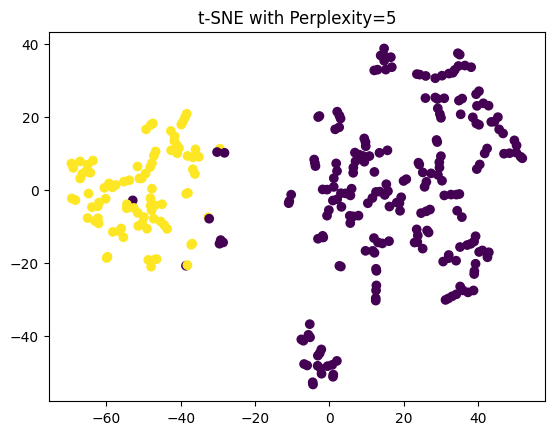

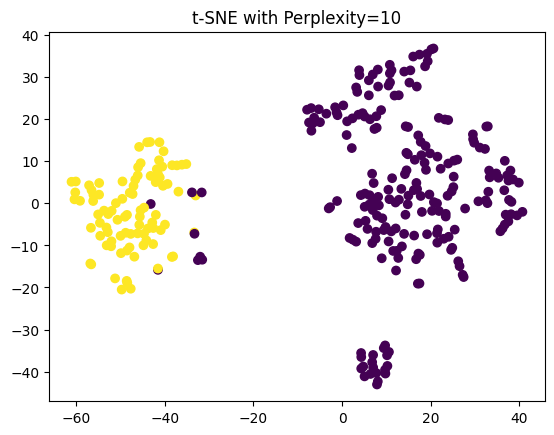

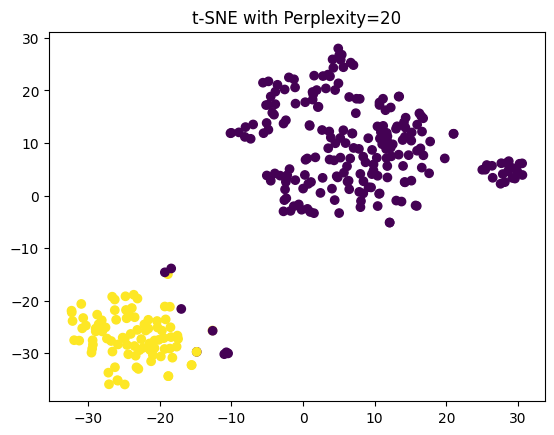

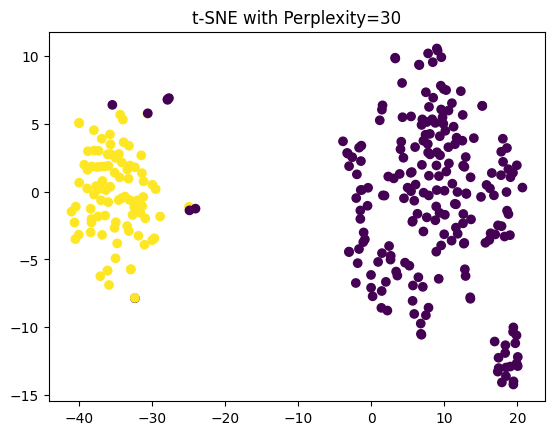

In [36]:
from sklearn.manifold import TSNE
perplexities = [5, 10, 20,30]

for perplexity in perplexities:
    tsne = TSNE(perplexity=perplexity, random_state=42, n_components=2)
    X_embedded = tsne.fit_transform(X)
#Random_state=42 By using a fixed number, we get always the same distribution if we run our code again from the beginning.
    
# Plot the results
    plt.figure()
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=Influ_data_P['vaccine_response'])
    plt.title(f't-SNE with Perplexity={perplexity}')
    plt.show()

We are going with perplexity 20. Here the seperation of the clusters is the clearest.

In [37]:
model_tSNE = TSNE(n_components=2, perplexity=20, random_state=42)
X_embedded = model_tSNE.fit_transform(X_train_std)

Make X_embedded into a Pandas DataFrame with columns t-SNE_1, t-SNE_2 and the label label

In [38]:
# Convert to DataFrame and reset index
tsne_result = pd.DataFrame(X_embedded, columns=["t-SNE_1", "t-SNE_2"])
tsne_result.reset_index(drop=True, inplace=True)

# Ensure y_train has the same index
y_train_reset = y_train.reset_index(drop=True)
#I had the problem of NaN values in the vaccine_response column. By resetting the indexes this issue is resolved.

# Add the target column to the t-SNE result
tsne_result["vaccine_response"] = y_train_reset

# Check the result
tsne_result

,t-SNE_1,t-SNE_2,vaccine_response
0,-0.844486,37.697502,1
1,-1.297488,-4.989097,0
2,-0.242978,-11.182236,0
3,-10.736916,-2.050235,0
4,-1.121756,38.629444,1
...,...,...,...
207,2.321195,-9.033773,0
208,-1.900424,-5.427563,0
209,1.901963,-19.598827,0
210,7.845675,33.098515,1


> Visualization of t-SNE dimensions

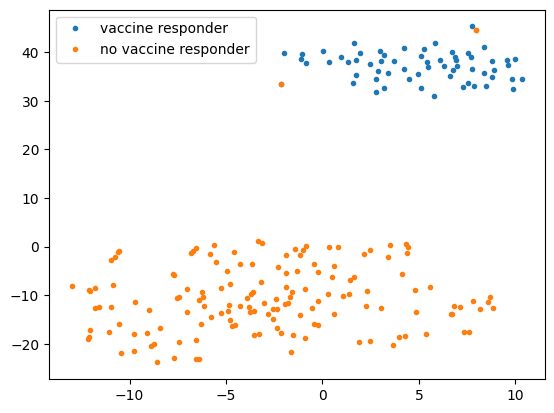

In [39]:
fig, ax = plt.subplots()
tmp = tsne_result[tsne_result["vaccine_response"]==1]
ax.plot(tmp["t-SNE_1"], tmp["t-SNE_2"], marker='o', linestyle='', ms=3, label="vaccine responder")
tmp = tsne_result[tsne_result["vaccine_response"]==0]
ax.plot(tmp["t-SNE_1"], tmp["t-SNE_2"], marker='o', linestyle='', ms=3, label="no vaccine responder")
ax.legend()
plt.show()

## Model training 2: DecisionTreeRegressor model

### Fit a DecisionTreeRegressor model

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
iowa_model = DecisionTreeRegressor(random_state = 42)

#fit the model
iowa_model.fit(X_train_std, y_train)
iowa_model

DecisionTreeRegressor(random_state=42)

Predictions for the datapoints in the test set (X_test_std)

In [42]:
predictions = iowa_model.predict(X_test_std)
print(predictions)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.]


Are these correct?

In [43]:
predictions = iowa_model.predict(X_test_std.head())
print(predictions)
y_test.head()

[0. 0. 1. 0. 0.]


247    0
298    0
258    1
293    0
64     0
Name: vaccine_response, dtype: int64

We can see that for the first few results, the prediction was correct.

### Method Validation

In [44]:
from sklearn.metrics import mean_absolute_error

predictions = iowa_model.predict(X_test_std)
mean_absolute_error(y_test, predictions)

0.010869565217391304

With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality. So on average, our predictions are off by about 0.01. This is quite low and can again be due to the class imbalance in the dataset.

In [45]:
def get_mae(max_leaf_nodes, X_train_std, X_test_std, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=42)
    model.fit(X_train_std, y_train)
    preds_val = model.predict(X_test_std)
    mae = mean_absolute_error(y_test, preds_val)
    return mae

In [46]:
for max_leaf_nodes in [2, 3, 4, 5, 10, 100]:
    my_mae = get_mae(max_leaf_nodes, X_train_std, X_test_std, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" % (max_leaf_nodes, my_mae))

Max leaf nodes: 2  		 Mean Absolute Error:  0.015355
Max leaf nodes: 3  		 Mean Absolute Error:  0.010870
Max leaf nodes: 4  		 Mean Absolute Error:  0.010870
Max leaf nodes: 5  		 Mean Absolute Error:  0.010870
Max leaf nodes: 10  		 Mean Absolute Error:  0.010870
Max leaf nodes: 100  		 Mean Absolute Error:  0.010870


We can see that after 3 leaves the mean absolute error stays the same. So 3 is the optimal number of leaves.

In [56]:
from sklearn.model_selection import cross_val_score
# Control the predictions with 3 leaves
iowa_model = DecisionTreeRegressor(max_leaf_nodes=3, random_state=42)
iowa_model.fit(X_train_std, y_train)
preds_val = iowa_model.predict(X_test_std)
print("Predictions:", preds_val)
print("Actual values:", y_test.values)

# Cross-validation
scores = cross_val_score(iowa_model, X_train_std, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Cross-validation scores:", -scores)
print("Mean cross-validation score:", -scores.mean())

Predictions: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
Actual values: [0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0]
Cross-validation scores: [0.         0.06976744 0.04761905 0.04761905 0.02380952]
Mean cross-validation score: 0.03776301218161683


Visualization of the dicision tree

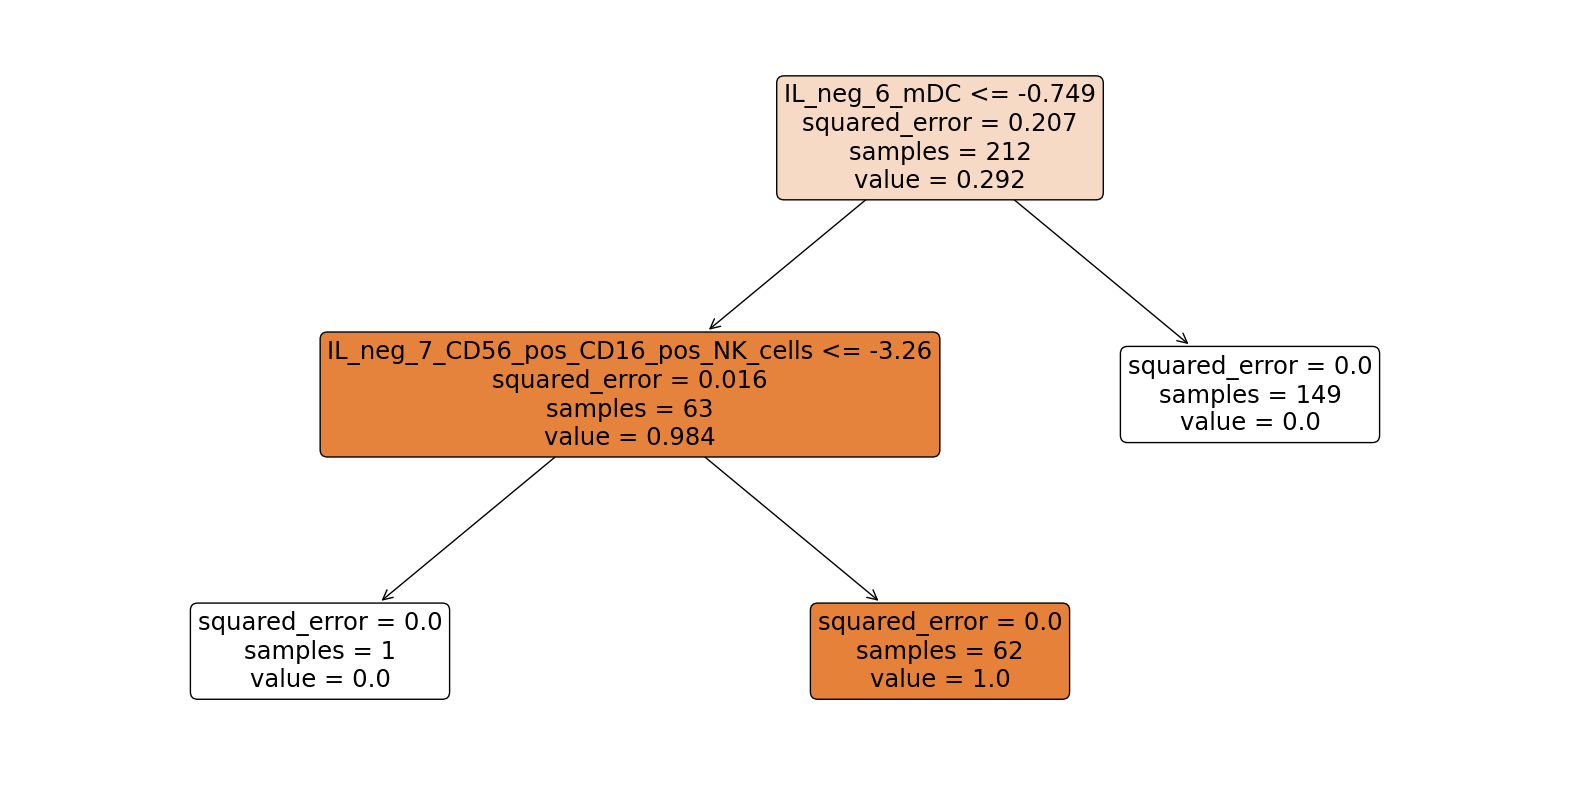

In [57]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(iowa_model, filled=True, feature_names=X.columns, rounded=True)
plt.show()

If we look back at the missing values in the experimental data in R (missing_values_exp), we see that for both these cell types there are 0.96 missing values. We splitted the dataset into responders and non-responders and imputated the mean values of all celtypes in both of these datasets. We can asssume here that all the missing in one of the groups, leading to an easy prediction.